In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Current device: ",device)

Current device:  cuda


# 2-2-1 using TAs second test 
# a.using TAs second test and without data augmentation
# b.using TAs second test and with data augmentation by imgaug

## purpose: 
## a.using TAs second test and without data augmentation

In [3]:
transform_train = transforms.Compose([
    
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

#The transform function for test data
transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

In [4]:
#Use API to load Food-11 train dataset
trainset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/training', transform=transform_train)


#def show_dataset(dataset, n=1):
#  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
#                   for i in range(100)))
#  plt.imshow(img)
#  plt.axis('off')

#show_dataset(trainset)

print('using TAs second test Food-11_04')
#Use API to load Food-11 test dataset 
#using TA's second test Food-11_04 
testset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_04/evaluation', transform=transform_test)

using TAs second test Food-11_04


In [ ]:
#if batch_size is 64 ,cuda will out of memory
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)

#show images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

#dataiter = iter(testloader)
#images, labels = dataiter.next()
for data in testloader:
    images, labels = data
    print(images.size())
    imshow(torchvision.utils.make_grid(images,nrow=5))

classes = ('bread', 'dairy products', 'dessert', 'egg',
'fried food', 'meat', 'noodles & pasta', 'rice', 'seefood', 'soup', 'vegetables & fruits')

torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


torch.Size([32, 3, 224, 224])


In [6]:
import torch.nn as nn
n_class=11

#load TAs pretrained.ckpt
net = torchvision.models.resnet18(pretrained=False)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, n_class)       
checkpoint = torch.load('./new_pretrained.ckpt')
net.load_state_dict(checkpoint['state_dict'])

#print(net)
print('Finished Loading')

Finished Loading


In [7]:
net = net.to(device) 

In [8]:
import torch.optim as optim

#loss function
criterion = nn.CrossEntropyLoss()
#optimization algorithm\
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)

In [9]:
import time

since = time.time()

net.train()

for epoch in range(30):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
    print('%d epoch, training accuracy: %.4f' % (epoch+1, 100.*correct/len(trainset)))
print('Finished Training')

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

[1,    50] loss: 2.621
[1,   100] loss: 0.617
[1,   150] loss: 0.445
[1,   200] loss: 0.391
[1,   250] loss: 0.353
[1,   300] loss: 0.314
1 epoch, training accuracy: 79.9108
[2,    50] loss: 0.176
[2,   100] loss: 0.160
[2,   150] loss: 0.147
[2,   200] loss: 0.143
[2,   250] loss: 0.161
[2,   300] loss: 0.138
2 epoch, training accuracy: 95.5301
[3,    50] loss: 0.089
[3,   100] loss: 0.084
[3,   150] loss: 0.090
[3,   200] loss: 0.088
[3,   250] loss: 0.077
[3,   300] loss: 0.071
3 epoch, training accuracy: 98.1857
[4,    50] loss: 0.044
[4,   100] loss: 0.047
[4,   150] loss: 0.049
[4,   200] loss: 0.051
[4,   250] loss: 0.043
[4,   300] loss: 0.043
4 epoch, training accuracy: 99.1790
[5,    50] loss: 0.039
[5,   100] loss: 0.027
[5,   150] loss: 0.024
[5,   200] loss: 0.031
[5,   250] loss: 0.026
[5,   300] loss: 0.035
5 epoch, training accuracy: 99.5743
[6,    50] loss: 0.028
[6,   100] loss: 0.020
[6,   150] loss: 0.025
[6,   200] loss: 0.030
[6,   250] loss: 0.026
[6,   300] loss

In [10]:
print('==> Testing model..')
net.eval()

==> Testing model..


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [11]:
correct = 0
total = 0
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device) 
        labels = labels.to(device) 
        outputs = net(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



print('Total accuracy is: %.1f %% and loss is: %.2f' % (
    100 * correct / total,loss))
for i in range(11):
    print('Accuracy of %5s : %.1f %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Total accuracy is: 85.2 % and loss is: 0.78
Accuracy of bread : 77.1 %
Accuracy of dairy products : 75.0 %
Accuracy of dessert : 92.9 %
Accuracy of   egg : 80.0 %
Accuracy of fried food : 81.8 %
Accuracy of  meat : 80.6 %
Accuracy of noodles & pasta : 94.2 %
Accuracy of  rice : 100.0 %
Accuracy of seefood : 75.0 %
Accuracy of  soup : 97.2 %
Accuracy of vegetables & fruits : 89.1 %


## purpose: 
## b.using TAs second test and with data augmentation by imgaug

In [74]:
#The transform function for train data
from imgaug import augmenters as iaa
class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([        
        #iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        #iaa.Fliplr(0.5),
        iaa.Affine(rotate= 30),
        #iaa.Sometimes(0.25,
        #              iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
        #                         iaa.CoarseDropout(0.1, size_percent=0.5)])),
        #iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

#Mix transform and imgaug
transform_train = transforms.Compose([
    
        ImgAugTransform(),
        lambda x: PIL.Image.fromarray(x),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])


#The transform function for test data
transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

In [75]:
#Use API to load Food-11 train dataset
trainset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/training', transform=transform_train)

#Use API to load Food-11 test dataset 
#using TA's second test Food-11_04
testset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_04/evaluation', transform=transform_test)


In [76]:
#if batch_size is 64 ,cuda will out of memory
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
imshow(torchvision.utils.make_grid(images))



testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)

classes = ('bread', 'dairy products', 'dessert', 'egg',
'fried food', 'meat', 'noodles & pasta', 'rice', 'seefood', 'soup', 'vegetables & fruits')

torch.Size([32, 3, 224, 224])


In [77]:
import torch.nn as nn
n_class=11

net = torchvision.models.resnet18(pretrained=False)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, n_class)       
checkpoint = torch.load('./new_pretrained.ckpt')
#print(checkpoint)

net.load_state_dict(checkpoint['state_dict'])

#print(net)
print('Finished Loading')

Finished Loading


In [78]:
net = net.to(device) 

In [79]:
import torch.optim as optim

#loss function
criterion = nn.CrossEntropyLoss()
#optimization algorithm\
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)

In [80]:
import time

since = time.time()

net.train()

for epoch in range(30):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
    print('%d epoch, training accuracy: %.4f' % (epoch+1, 100.*correct/len(trainset)))
print('Finished Training')

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

[1,    50] loss: 2.632
[1,   100] loss: 1.045
[1,   150] loss: 0.836
[1,   200] loss: 0.721
[1,   250] loss: 0.643
[1,   300] loss: 0.631
1 epoch, training accuracy: 68.5181
[2,    50] loss: 0.526
[2,   100] loss: 0.513
[2,   150] loss: 0.461
[2,   200] loss: 0.449
[2,   250] loss: 0.455
[2,   300] loss: 0.445
2 epoch, training accuracy: 84.4618
[3,    50] loss: 0.337
[3,   100] loss: 0.353
[3,   150] loss: 0.337
[3,   200] loss: 0.358
[3,   250] loss: 0.373
[3,   300] loss: 0.354
3 epoch, training accuracy: 88.8101
[4,    50] loss: 0.286
[4,   100] loss: 0.295
[4,   150] loss: 0.292
[4,   200] loss: 0.280
[4,   250] loss: 0.300
[4,   300] loss: 0.306
4 epoch, training accuracy: 90.6548
[5,    50] loss: 0.223
[5,   100] loss: 0.214
[5,   150] loss: 0.247
[5,   200] loss: 0.202
[5,   250] loss: 0.256
[5,   300] loss: 0.264
5 epoch, training accuracy: 92.1447
[6,    50] loss: 0.180
[6,   100] loss: 0.185
[6,   150] loss: 0.184
[6,   200] loss: 0.194
[6,   250] loss: 0.194
[6,   300] loss

In [81]:
print('==> Testing model..')
net.eval()

==> Testing model..


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [82]:
correct = 0
total = 0
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device) 
        labels = labels.to(device) 
        outputs = net(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



print('Total accuracy is: %.1f %% and loss is: %.2f' % (
    100 * correct / total,loss))
for i in range(11):
    print('Accuracy of %5s : %.1f %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Total accuracy is: 86.7 % and loss is: 0.85
Accuracy of bread : 75.0 %
Accuracy of dairy products : 75.0 %
Accuracy of dessert : 96.4 %
Accuracy of   egg : 88.3 %
Accuracy of fried food : 81.8 %
Accuracy of  meat : 86.1 %
Accuracy of noodles & pasta : 92.3 %
Accuracy of  rice : 95.0 %
Accuracy of seefood : 83.3 %
Accuracy of  soup : 94.4 %
Accuracy of vegetables & fruits : 89.1 %


# 2-2-2 using original test 
# a.using original test and without data augmentation
# b.using original test and with data augmentation by imgaug

## purpose:
## a.using original test and without data augmentation

In [23]:
transform_train = transforms.Compose([
    
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

#The transform function for test data
transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

In [24]:
#Use API to load Food-11 train dataset
trainset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/training', transform=transform_train)
#use original test
testset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/evaluation', transform=transform_test)

In [25]:
#if batch_size is 64 ,cuda will out of memory
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)

classes = ('bread', 'dairy products', 'dessert', 'egg',
'fried food', 'meat', 'noodles & pasta', 'rice', 'seefood', 'soup', 'vegetables & fruits')

In [26]:
import torch.nn as nn
n_class=11

net = torchvision.models.resnet18(pretrained=False)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, n_class)       
checkpoint = torch.load('./new_pretrained.ckpt')
net.load_state_dict(checkpoint['state_dict'])

print('Finished Loading')

Finished Loading


In [27]:
net = net.to(device) 

In [28]:
import torch.optim as optim

#loss function
criterion = nn.CrossEntropyLoss()
#optimization algorithm\
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)

In [29]:
import time

since = time.time()

net.train()

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
    print('%d epoch, training accuracy: %.4f' % (epoch+1, 100.*correct/len(trainset)))
print('Finished Training')

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

[1,    50] loss: 2.597
[1,   100] loss: 0.765
[1,   150] loss: 0.519
[1,   200] loss: 0.375
[1,   250] loss: 0.349
[1,   300] loss: 0.270
1 epoch, training accuracy: 78.1776
[2,    50] loss: 0.194
[2,   100] loss: 0.174
[2,   150] loss: 0.159
[2,   200] loss: 0.164
[2,   250] loss: 0.164
[2,   300] loss: 0.144
2 epoch, training accuracy: 95.3173
[3,    50] loss: 0.090
[3,   100] loss: 0.091
[3,   150] loss: 0.076
[3,   200] loss: 0.075
[3,   250] loss: 0.073
[3,   300] loss: 0.066
3 epoch, training accuracy: 98.2972
[4,    50] loss: 0.049
[4,   100] loss: 0.049
[4,   150] loss: 0.048
[4,   200] loss: 0.049
[4,   250] loss: 0.046
[4,   300] loss: 0.043
4 epoch, training accuracy: 99.2398
[5,    50] loss: 0.042
[5,   100] loss: 0.027
[5,   150] loss: 0.027
[5,   200] loss: 0.029
[5,   250] loss: 0.030
[5,   300] loss: 0.035
5 epoch, training accuracy: 99.5540
[6,    50] loss: 0.027
[6,   100] loss: 0.025
[6,   150] loss: 0.018
[6,   200] loss: 0.025
[6,   250] loss: 0.024
[6,   300] loss

In [30]:
print('==> Testing model..')
net.eval()

==> Testing model..


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [31]:
correct = 0
total = 0
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device) 
        labels = labels.to(device) 
        outputs = net(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



print('Total accuracy is: %.1f %% and loss is: %.2f' % (
    100 * correct / total,loss))
for i in range(11):
    print('Accuracy of %5s : %.1f %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Total accuracy is: 90.5 % and loss is: 0.15
Accuracy of bread : 85.4 %
Accuracy of dairy products : 90.0 %
Accuracy of dessert : 92.9 %
Accuracy of   egg : 83.3 %
Accuracy of fried food : 86.4 %
Accuracy of  meat : 91.7 %
Accuracy of noodles & pasta : 94.2 %
Accuracy of  rice : 95.0 %
Accuracy of seefood : 100.0 %
Accuracy of  soup : 94.4 %
Accuracy of vegetables & fruits : 100.0 %


## purpose: 
## b.using original test and with data augmentation by imgaug

In [32]:
#The transform function for train data
from imgaug import augmenters as iaa
class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([        
        #iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        #iaa.Fliplr(0.5),
        iaa.Affine(rotate=(-45, 45), mode='symmetric'),
        #iaa.Sometimes(0.25,
        #              iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
        #                         iaa.CoarseDropout(0.1, size_percent=0.5)])),
        #iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

#mix transform and imgaug
transform_train = transforms.Compose([
    
        ImgAugTransform(),
        lambda x: PIL.Image.fromarray(x),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])


#The transform function for test data
transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

In [33]:
#Use API to load Food-11 train dataset
trainset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/training', transform=transform_train)

#use original test
testset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/evaluation', transform=transform_test)

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f6c4468ab38>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/opt/conda/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/opt/conda/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/opt/conda/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/opt/conda/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_proces

torch.Size([32, 3, 224, 224])


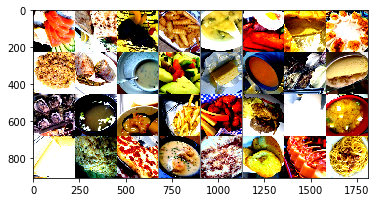

In [46]:
#if batch_size is 64 ,cuda will out of memory
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

#show images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
imshow(torchvision.utils.make_grid(images))

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)


#dataiter = iter(testloader)
#images, labels = dataiter.next()
#print(images.size())
#imshow(torchvision.utils.make_grid(images))

classes = ('bread', 'dairy products', 'dessert', 'egg',
'fried food', 'meat', 'noodles & pasta', 'rice', 'seefood', 'soup', 'vegetables & fruits')

In [35]:
import torch.nn as nn
n_class=11

net = torchvision.models.resnet18(pretrained=False)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, n_class)       
checkpoint = torch.load('./new_pretrained.ckpt')
net.load_state_dict(checkpoint['state_dict'])

print('Finished Loading')

Finished Loading


In [36]:
net = net.to(device) 

In [37]:
import torch.optim as optim

#loss function
criterion = nn.CrossEntropyLoss()
#optimization algorithm\
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)

In [38]:
import time

since = time.time()

net.train()

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
    print('%d epoch, training accuracy: %.4f' % (epoch+1, 100.*correct/len(trainset)))
print('Finished Training')

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

[1,    50] loss: 2.618
[1,   100] loss: 1.000
[1,   150] loss: 0.778
[1,   200] loss: 0.677
[1,   250] loss: 0.638
[1,   300] loss: 0.553
1 epoch, training accuracy: 70.0588
[2,    50] loss: 0.504
[2,   100] loss: 0.501
[2,   150] loss: 0.524
[2,   200] loss: 0.451
[2,   250] loss: 0.449
[2,   300] loss: 0.433
2 epoch, training accuracy: 84.5327
[3,    50] loss: 0.430
[3,   100] loss: 0.387
[3,   150] loss: 0.374
[3,   200] loss: 0.362
[3,   250] loss: 0.380
[3,   300] loss: 0.386
3 epoch, training accuracy: 87.2289
[4,    50] loss: 0.330
[4,   100] loss: 0.320
[4,   150] loss: 0.354
[4,   200] loss: 0.383
[4,   250] loss: 0.314
[4,   300] loss: 0.317
4 epoch, training accuracy: 88.9925
[5,    50] loss: 0.286
[5,   100] loss: 0.277
[5,   150] loss: 0.281
[5,   200] loss: 0.329
[5,   250] loss: 0.304
[5,   300] loss: 0.301
5 epoch, training accuracy: 90.4014
[6,    50] loss: 0.242
[6,   100] loss: 0.253
[6,   150] loss: 0.268
[6,   200] loss: 0.245
[6,   250] loss: 0.223
[6,   300] loss

In [39]:
print('==> Testing model..')
net.eval()

==> Testing model..


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [40]:
correct = 0
total = 0
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device) 
        labels = labels.to(device) 
        outputs = net(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



print('Total accuracy is: %.1f %% and loss is: %.2f' % (
    100 * correct / total,loss))
for i in range(11):
    print('Accuracy of %5s : %.1f %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Total accuracy is: 90.4 % and loss is: 0.06
Accuracy of bread : 75.0 %
Accuracy of dairy products : 85.0 %
Accuracy of dessert : 96.4 %
Accuracy of   egg : 86.7 %
Accuracy of fried food : 84.1 %
Accuracy of  meat : 91.7 %
Accuracy of noodles & pasta : 90.4 %
Accuracy of  rice : 90.0 %
Accuracy of seefood : 100.0 %
Accuracy of  soup : 91.7 %
Accuracy of vegetables & fruits : 100.0 %
